In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check for CUDA availability

In [ ]:
!nvidia-smi

Mon Dec 16 07:15:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import zipfile
!unzip '/content/drive/MyDrive/Colab Notebooks/masoume/shoes.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/masoume/shoes.zip
   creating: shoes/
   creating: shoes/test/
   creating: shoes/test/adidas/
  inflating: shoes/test/adidas/0.jpg  
  inflating: shoes/test/adidas/1.jpg  
  inflating: shoes/test/adidas/10.jpg  
  inflating: shoes/test/adidas/11.jpg  
  inflating: shoes/test/adidas/12.jpg  
  inflating: shoes/test/adidas/13.jpg  
  inflating: shoes/test/adidas/14.jpg  
  inflating: shoes/test/adidas/15.jpg  
  inflating: shoes/test/adidas/16.jpg  
  inflating: shoes/test/adidas/17.jpg  
  inflating: shoes/test/adidas/18.jpg  
  inflating: shoes/test/adidas/19.jpg  
  inflating: shoes/test/adidas/2.jpg  
  inflating: shoes/test/adidas/20.jpg  
  inflating: shoes/test/adidas/21.jpg  
  inflating: shoes/test/adidas/22.jpg  
  inflating: shoes/test/adidas/23.jpg  
  inflating: shoes/test/adidas/24.jpg  
  inflating: shoes/test/adidas/25.jpg  
  inflating: shoes/test/adidas/26.jpg  
  inflating: shoes/test/adidas/27.jpg  
  inflating: shoes/

In [ ]:
import numpy as np
import cv2 as cv
import os

classes = os.listdir("shoes/train/")
print(f'All classes: {classes}')
class_lables = np.arange(0, len(classes), 1)
print(f'Class lables: {class_lables}')

All classes: ['converse', 'adidas', 'nike']
Class lables: [0 1 2]


In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for _class, lable in zip(classes, class_lables):
  path_images = os.listdir("shoes/train/"+_class)
  path_images = ["shoes/train/" + _class + "/" + img_path for img_path in path_images]
  x_train.extend([cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB) for img in path_images])
  y_train.extend(np.zeros(len(path_images)) + lable)

  path_images = os.listdir("shoes/test/"+_class)
  path_images = ["shoes/test/" + _class + "/" + img_path for img_path in path_images]
  x_test.extend([cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB) for img in path_images])
  y_test.extend(np.zeros(len(path_images)) + lable)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((711, 240, 240, 3), (711,), (114, 240, 240, 3), (114,))

Some data samples

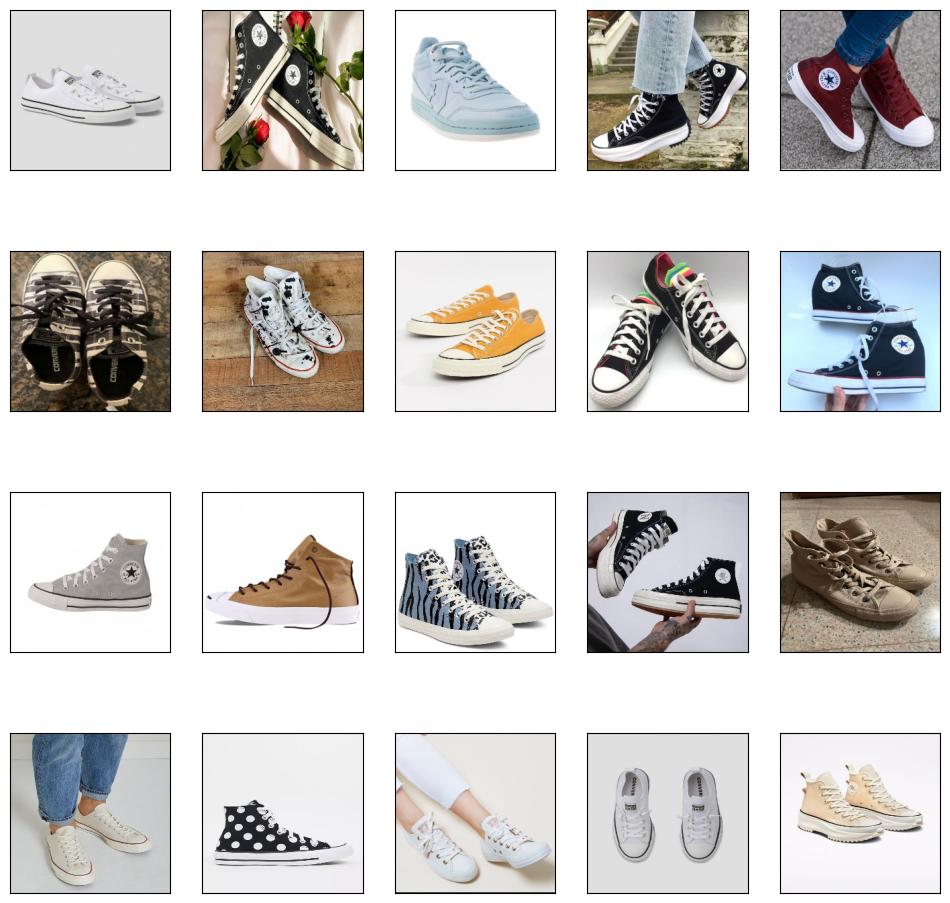

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))

for i in range(4):
  plt.subplot(4, 5, i*5 +1, xticks=[], yticks=[])
  plt.imshow(x_train[i*5+0], cmap=plt.cm.binary_r)

  plt.subplot(4, 5, i*5 +2, xticks=[], yticks=[])
  plt.imshow(x_train[i*5+1], cmap=plt.cm.binary_r)

  plt.subplot(4, 5, i*5 +3, xticks=[], yticks=[])
  plt.imshow(x_train[i*5+2], cmap=plt.cm.binary_r)

  plt.subplot(4, 5, i*5 +4, xticks=[], yticks=[])
  plt.imshow(x_train[i*5+3], cmap=plt.cm.binary_r)

  plt.subplot(4, 5, i*5 +5, xticks=[], yticks=[])
  plt.imshow(x_train[i*5+4], cmap=plt.cm.binary_r)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns


def plot_loss(history):
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']
  epochs = range(1, len(train_loss) + 1)

  plt.plot(epochs, train_loss, 'g-', label='Training loss')
  plt.plot(epochs, valid_loss, 'b-', label='Validation loss')
  plt.title('Training and Validation Loss'), plt.xlabel('Epochs'), plt.ylabel('Loss'), plt.legend(), plt.grid(True), plt.show()
  plt.show()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


def calculate_metrics(true_lables, predicted_lables):
  return {
    'Accuracy': accuracy_score(true_lables, predicted_lables),
    'Precision': precision_score(true_lables, predicted_lables, average='weighted'),
    'Recall': recall_score(true_lables, predicted_lables, average='weighted'),
    'F1': f1_score(true_lables, predicted_lables, average='weighted'),
  }


def plot_cm(model, x, y):
  y_pred = []
  y_pred = model.predict(x)
  y_pred = [y.argmax() for y in y_pred]
  print(calculate_metrics(y, y_pred))

  cm = confusion_matrix(y, y_pred)

  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=unique_labels(y_test, y_pred), yticklabels=unique_labels(y_test, y_pred))
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


seed = 13
np.random.seed(seed)
tf.random.set_seed(seed)


def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape)
    return np.clip(image + noise, 0, 1)


data_generator = ImageDataGenerator(
  # preprocessing_function=add_noise,
  rotation_range=5,
  width_shift_range=0.02,
  height_shift_range=0.02,
  shear_range=0.02,
  zoom_range=0.02,
  horizontal_flip=True,
  fill_mode='constant'
)

generator = data_generator.flow(x_train, y_train, batch_size=4)

### First model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Softmax, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), strides=1)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dropout(0.1)(x)

x = Flatten()(x)

x = Dense(1024, activation=relu, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5))(x)
x = Dropout(0.1)(x)
x = Dense(512, activation=relu, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5))(x)
x = Dropout(0.1)(x)
x = Dense(256, activation=relu, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5))(x)
x = Dropout(0.1)(x)
x = Dense(128, activation=relu, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5))(x)
x = Dropout(0.1)(x)
x = Dense(64, activation=relu, kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5))(x)
x = Dropout(0.1)(x)

outputs = Dense(3, activation='softmax', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5))(x)

model1 = Model(inputs=inputs, outputs=outputs)

model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 238, 238, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 238, 238, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 238, 238, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 119, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 117, 117, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 117, 117, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 117, 117, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 115, 115, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 115, 115, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 115, 115, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 113, 113, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 113, 113, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 113, 113, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 111, 111, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 53, 53, 64)          │          36,9

 Total params: 158,209,891 (603.52 MB)

 Trainable params: 158,209,123 (603.52 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop

model1.compile(optimizer=Adam(learning_rate = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

check_point_name = 'best_weight.keras'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history1 = model1.fit(
    generator,
    epochs=15,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[earlyStop, check_point],
    shuffle=True
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.3386 - loss: 2.4868
Epoch 1: val_loss improved from inf to 1.15406, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 94s 379ms/step - accuracy: 0.3387 - loss: 2.4851 - val_accuracy: 0.3860 - val_loss: 1.1541
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3222 - loss: 1.4237
Epoch 2: val_loss improved from 1.15406 to 1.13829, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.3223 - loss: 1.4236 - val_accuracy: 0.4123 - val_loss: 1.1383
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3065 - loss: 1.3237
Epoch 3: val_loss did not improve from 1.13829
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.3066 - loss: 1.3234 - val_accuracy: 0.3421 - val_loss: 1.1464
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3403 - loss: 1.1957
Epoch 4: val_loss improved from 1.13829 to 1.09655, saving model to best_weight.keras
1

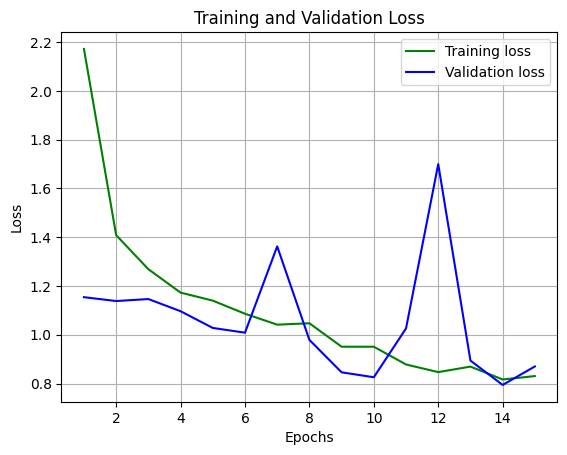

In [ ]:
plot_loss(history1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
{'Accuracy': 0.6666666666666666, 'Precision': 0.6685185185185185, 'Recall': 0.6666666666666666, 'F1': 0.6611515756522598}


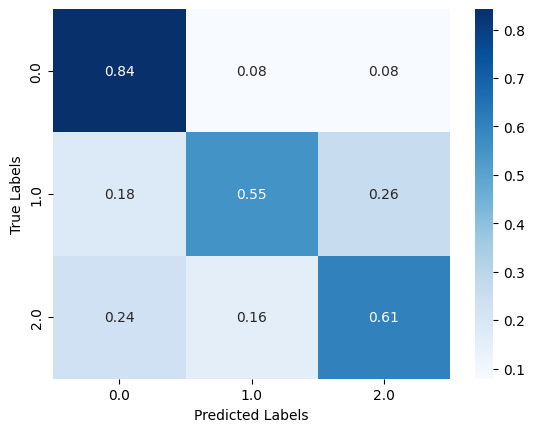

In [ ]:
plot_cm(model1, x_test, y_test)

Test the same model with RMSprop Optimizer

In [ ]:
model2 = Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer=RMSprop(learning_rate = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

check_point_name = 'best_weight.keras'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history2 = model2.fit(
    generator,
    epochs=15,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[earlyStop, check_point],
    shuffle=True
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.3549 - loss: 2.6696
Epoch 1: val_loss improved from inf to 1.19285, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 71s 268ms/step - accuracy: 0.3549 - loss: 2.6629 - val_accuracy: 0.3333 - val_loss: 1.1928
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3597 - loss: 1.4730
Epoch 2: val_loss improved from 1.19285 to 1.14381, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 30s 168ms/step - accuracy: 0.3597 - loss: 1.4725 - val_accuracy: 0.3684 - val_loss: 1.1438
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3829 - loss: 1.2818
Epoch 3: val_loss improved from 1.14381 to 1.07544, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.3829 - loss: 1.2817 - val_accuracy: 0.5000 - val_loss: 1.0754
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4138 - loss: 1.2089
Epoch 4: val_loss did not improve from 1.07544
1

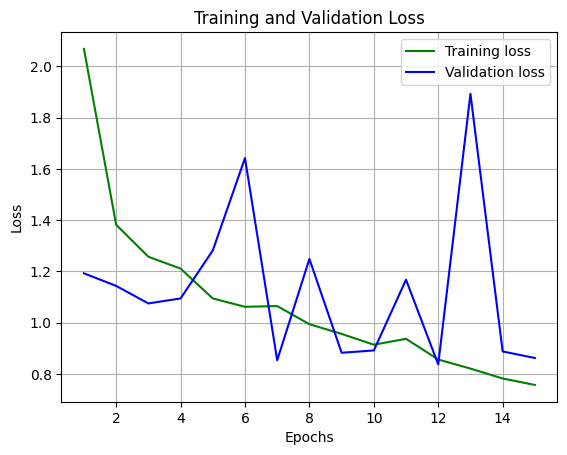

In [ ]:
plot_loss(history2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
{'Accuracy': 0.6403508771929824, 'Precision': 0.6480051480051481, 'Recall': 0.6403508771929824, 'F1': 0.636377568791362}


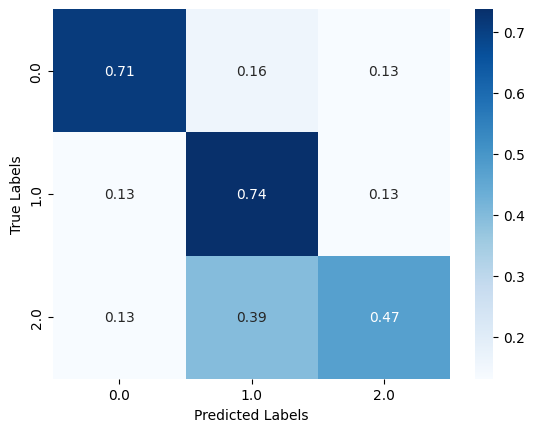

In [ ]:
plot_cm(model2, x_test, y_test)

RMSProp optimizer cause more ups and downs on its Loss function. Let's try more training epochs by using RMSProp optimizer with lower learning rate.

In [ ]:
model2 = Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer=RMSprop(learning_rate = 0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

check_point_name = 'best_weight.keras'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history2 = model2.fit(
    generator,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[earlyStop, check_point],
    shuffle=True
)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6958 - loss: 0.7560
Epoch 1: val_loss improved from inf to 0.81170, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 60s 260ms/step - accuracy: 0.6960 - loss: 0.7556 - val_accuracy: 0.6579 - val_loss: 0.8117
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7359 - loss: 0.6857
Epoch 2: val_loss did not improve from 0.81170
178/178 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - accuracy: 0.7361 - loss: 0.6855 - val_accuracy: 0.6579 - val_loss: 0.8759
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7688 - loss: 0.5796
Epoch 3: val_loss did not improve from 0.81170
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.7689 - loss: 0.5796 - val_accuracy: 0.6404 - val_loss: 0.8458
Epoch 4/10
177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7979 - loss: 0.5859
Epoch 4: val_loss did not improve from 0.81170
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.7977 - loss: 

Running the same model with Adam or RMSProb optimizer didn't do any more. Let's try a ResNet model to add deeper layers.

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.layers import Add

def resnet(input_shape, classes):
    X_input = Input(input_shape)

    # Initial convolution and pooling
    X = Conv2D(filters=32, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X_input)
    X = Activation(relu)(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # Residual Block 1
    X_shortcut = X
    X = Conv2D(filters=32, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(relu)(X)

    X = Conv2D(filters=32, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(relu)(X)

    X = Conv2D(filters=32, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Add()([X, X_shortcut])
    X = Activation(relu)(X)

    # Residual Block 2
    X_shortcut = Conv2D(filters=64, kernel_size=1, kernel_regularizer=l2(1e-3),
                        bias_regularizer=l2(1e-3), strides=1, padding='same')(X)

    X = Conv2D(filters=64, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(relu)(X)

    X = Conv2D(filters=64, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(relu)(X)

    X = Conv2D(filters=64, kernel_size=1, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Add()([X, X_shortcut])
    X = Activation(relu)(X)

    # Residual Block 3
    X_shortcut = Conv2D(filters=128, kernel_size=1, kernel_regularizer=l2(1e-3),
                        bias_regularizer=l2(1e-3), strides=1, padding='same')(X)

    X = Conv2D(filters=128, kernel_size=3, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(relu)(X)

    X = Conv2D(filters=128, kernel_size=3, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation(relu)(X)

    X = Conv2D(filters=128, kernel_size=3, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Add()([X, X_shortcut])
    X = Activation(relu)(X)

    # Final Convolution and Pooling
    X = Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(1e-3),
               bias_regularizer=l2(1e-3), strides=1, padding='same')(X)
    X = Activation(relu)(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # Fully connected layers with residual connection
    X = Flatten()(X)
    X = Dense(500, activation=relu, kernel_regularizer=l2(1e-4), bias_regularizer=l2(1e-4))(X)
    X_last = X
    X = Dense(500, activation=relu, kernel_regularizer=l2(1e-4), bias_regularizer=l2(1e-4))(X)
    X = Dropout(0.5)(X)
    X = Add()([X, X_last])

    # Output layer
    X = Dense(classes, activation=softmax, kernel_regularizer=l2(1e-4), bias_regularizer=l2(1e-4))(X)

    return Model(inputs=X_input, outputs=X)


In [ ]:
model3 = resnet(input_shape=x_train.shape[1:], classes=3)
model3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 240, 240, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 240, 240, 32)   │            128 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_11             │ (None, 240, 240, 32)   │              0 │ conv2d_12[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 120, 120, 32)   │              0 │ activation_11[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 120, 120, 32)   │          1,056 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 120, 120, 32)   │            128 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_12             │ (None, 120, 120, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 120, 120, 32)   │          1,056 │ activation_12[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 120, 120, 32)   │            128 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_13             │ (None, 120, 120, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 120, 120, 32)   │          1,056 │ activation_13[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 120, 120, 32)   │            128 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 120, 120, 32)   │              0 │ batch_normalization_1… │
│                           │                        │                │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_14             │ (None, 120, 120, 32)   │              0 │ add[0][0]              │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)   

 Total params: 58,285,271 (222.34 MB)

 Trainable params: 58,283,927 (222.34 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [ ]:
model3.compile(optimizer=Adam(learning_rate = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

check_point_name = 'best_weight.keras'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history3 = model3.fit(
  generator,
  epochs=15,
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[earlyStop, check_point],
  shuffle=True
)

Epoch 1/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3548 - loss: 70.4645
Epoch 1: val_loss improved from inf to 1.94983, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 76s 309ms/step - accuracy: 0.3549 - loss: 70.1986 - val_accuracy: 0.4298 - val_loss: 1.9498
Epoch 2/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4100 - loss: 2.0036
Epoch 2: val_loss improved from 1.94983 to 1.91114, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 34s 116ms/step - accuracy: 0.4101 - loss: 2.0034 - val_accuracy: 0.4211 - val_loss: 1.9111
Epoch 3/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4651 - loss: 1.8623
Epoch 3: val_loss improved from 1.91114 to 1.85032, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 126ms/step - accuracy: 0.4651 - loss: 1.8623 - val_accuracy: 0.4298 - val_loss: 1.8503
Epoch 4/15
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4740 - loss: 1.8443
Epoch 4: val_loss did not improve f

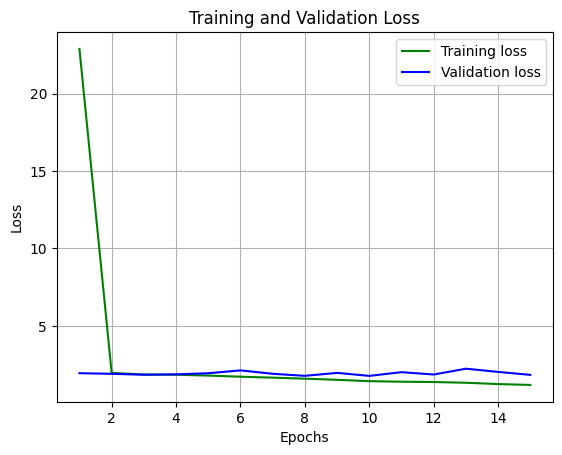

In [ ]:
plot_loss(history3)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step
{'Accuracy': 0.5526315789473685, 'Precision': 0.5492620279854322, 'Recall': 0.5526315789473685, 'F1': 0.5465359477124183}


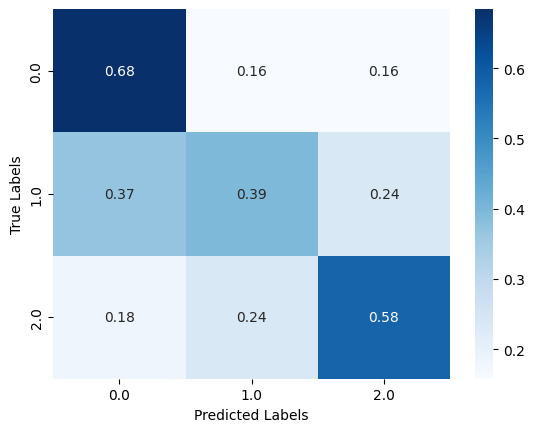

In [ ]:
plot_cm(model3, x_test, y_test)

It seems that the ResNet model has a more balanced accuracy compared to previous models. Let's try more training epochs.

In [ ]:
history3 = model3.fit(
  generator,
  epochs=10,
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[earlyStop, check_point],
  shuffle=True
)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8426 - loss: 1.1400
Epoch 1: val_loss did not improve from 1.77710
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8426 - loss: 1.1400 - val_accuracy: 0.5614 - val_loss: 1.9861
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8707 - loss: 1.0620
Epoch 2: val_loss did not improve from 1.77710
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.8705 - loss: 1.0624 - val_accuracy: 0.5526 - val_loss: 2.0155
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8259 - loss: 1.1308
Epoch 3: val_loss did not improve from 1.77710
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8259 - loss: 1.1310 - val_accuracy: 0.5351 - val_loss: 2.0410
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8759 - loss: 1.0742
Epoch 4: val_loss did not improve from 1.77710
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.8760 - loss: 1.0740 - val_accuracy: 0.5702 - val_l

Early stopping stops the training proccess, So we can't achive to higher accuracy using this model. Let's use VGG16 learned parameters as a base model to achive higher accuracy.

In [ ]:
from keras.models import Sequential
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])
base_model.trainable = False

model4 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,561,795 (105.14 MB)

 Trainable params: 12,847,107 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model4.compile(optimizer=Adam(learning_rate = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

check_point_name = 'best_weight.keras'
check_point = ModelCheckpoint(filepath = check_point_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history4 = model4.fit(
  generator,
  epochs=15,
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[earlyStop, check_point],
  shuffle=True
)

Epoch 1/15
177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4645 - loss: 15.7500
Epoch 1: val_loss improved from inf to 6.53114, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 49s 242ms/step - accuracy: 0.4655 - loss: 15.7121 - val_accuracy: 0.7368 - val_loss: 6.5311
Epoch 2/15
177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7520 - loss: 6.4177
Epoch 2: val_loss improved from 6.53114 to 6.49829, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.7523 - loss: 6.4046 - val_accuracy: 0.7719 - val_loss: 6.4983
Epoch 3/15
177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8788 - loss: 2.4711
Epoch 3: val_loss improved from 6.49829 to 5.04175, saving model to best_weight.keras
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.8785 - loss: 2.4706 - val_accuracy: 0.7368 - val_loss: 5.0417
Epoch 4/15
177/178 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8503 - loss: 2.4141
Epoch 4: val_loss improved from 5.0417

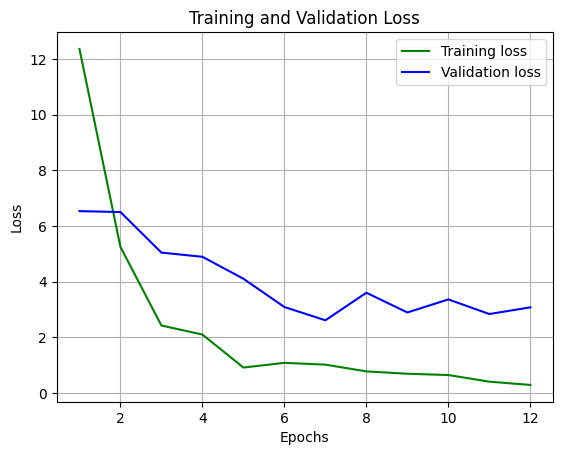

In [ ]:
plot_loss(history4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
{'Accuracy': 0.7894736842105263, 'Precision': 0.8012499840887972, 'Recall': 0.7894736842105263, 'F1': 0.7889533812419385}


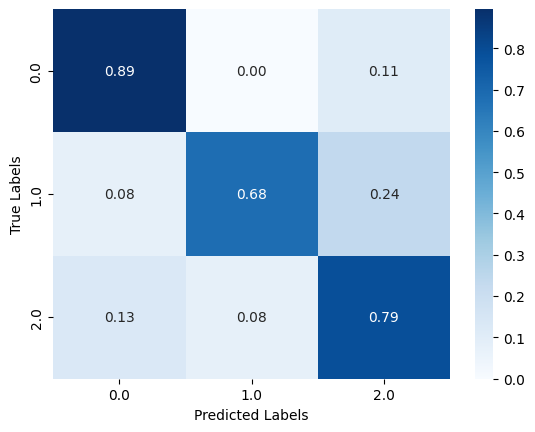

In [ ]:
plot_cm(model4, x_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step
{'Accuracy': 0.9887482419127989, 'Precision': 0.9889972449885305, 'Recall': 0.9887482419127989, 'F1': 0.9887462589378514}


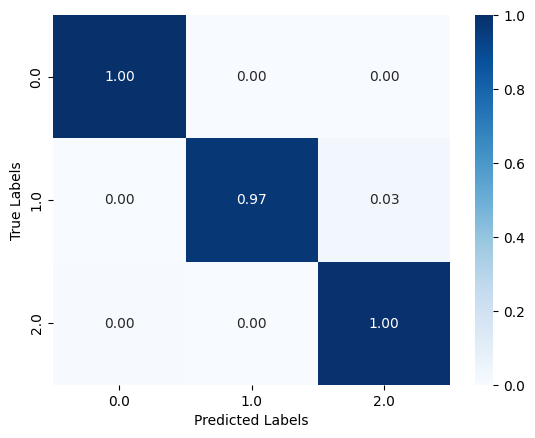

In [ ]:
plot_cm(model4, x_train, y_train)